## Import from src

In [1]:
from src.divide import DivideCatalog
from src.conker_series import ConKerConvolveCatalog
from src.summation import Summation2PCF, Summation3PCF, SummationNPCFdiag
from src.histogram import ProcessHistogram
from src.histogram import PlotMoments
from src.histogram import PlotHistograms

data_file = 'fnl0sim1.fits'
rand_file = 'randoms.fits'
cfg_file = 'ex_par.txt'

## Divide (partition) the randoms


=========================== DIVIDE STEP ===========================

Creating a divide plan for randoms
Cosmology and binning parameters initialized...
Created 45 total angular boxes...
Preparing the divide plan file...
Plotting angular boxes now...
Saving sky plot in ./divide/figures/...
Divide Step took 9.099759199999998 s CPU time




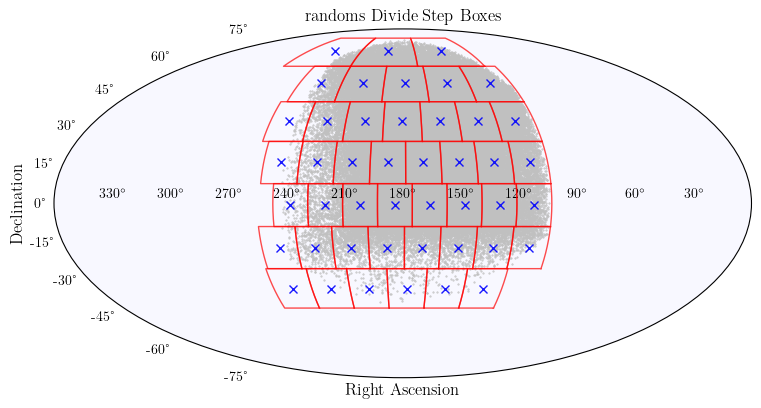

In [2]:
DivideCatalog(rand_file,cfg_file,
              
              # Opt
              save_plan = True,
              theta_user = 9,
              plot_results = True,
              save_plot = True,
              verbose = True)

## Convolve kernels in series

In [3]:
ConKerConvolveCatalog(data_file,rand_file,cfg_file,
                      
                      # Opt
                      store_rand = False,
                      ell_max=0,   #diagonal
                      verbose=True,
                      ftype = 'fits')


===================== CONKER CONVOLUTION STEP =====================

Convolving kernels with catalog fnl100sim1
Preparing to measure correlation functions...
Data file: fnl100sim1
Randoms file: randoms
Configuration: ex_par
Initial LOS at (RA: 132.65, DEC: -36.75)
Initial mapping box is 51.6 deg. by 36.0 deg.
Initial convolution box is 22.47 deg. by 18.0 deg.
Successful coordinate transformation...
Successful data histogram...
Successful randoms histogram...
Wrote initial region grid files...
Finished writing files for radial step s1 = 20.0 Mpc (or Mpc/h)
Finished writing files for radial step s1 = 30.0 Mpc (or Mpc/h)
Finished writing files for radial step s1 = 40.0 Mpc (or Mpc/h)
Finished writing files for radial step s1 = 50.0 Mpc (or Mpc/h)
Finished writing files for radial step s1 = 60.0 Mpc (or Mpc/h)
Finished writing files for radial step s1 = 70.0 Mpc (or Mpc/h)
Finished writing files for radial step s1 = 80.0 Mpc (or Mpc/h)
Finished writing files for radial step s1 = 90.0 Mpc 

## Compute Legendre multipoles of the 2pcf

In [ ]:
Summation2PCF(data_file,rand_file,cfg_file,
              
              # Opt
              ell_max=0,
              plot_correlation = True,
              save_plot = True, 
              verbose = True)

## Compute expanded 3pcf

In [ ]:
Summation3PCF(data_file,rand_file,cfg_file,
              
              # Opt
              ell_max=0,
              verbose = True)

## Compute diagonal elements of the npcf to desired n

In [ ]:
SummationNPCFdiag(data_file,rand_file,cfg_file,

                  # Opt
                  n_max=5,
                  verbose = True)

## Plot Histogram

In [2]:
fnl0 = ProcessHistogram('fnl0sim1.fits', 'randoms.fits', 'ex_par.txt', 45)
fnl100 = ProcessHistogram('fnl100sim1.fits', 'randoms.fits', 'ex_par.txt', 45)

Working on fnl0sim1.fits
Processing plain grids...

Plain grids processed

Processing data catalog...

Data catalog processed

Processing random catalog...

Random catalog processed

Combining calculated data...

Done!

Working on fnl100sim1.fits
Processing plain grids...

Plain grids processed

Processing data catalog...

Data catalog processed

Processing random catalog...

Random catalog processed

Combining calculated data...

Done!



In [3]:
# PlotMoments(fnl0, fnl100)

fnl0.calc_moment()
fnl100.calc_moment()

c:\Users\nhuma\Desktop\fnlsims\fnl0sim1\src\histogram.py:241: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


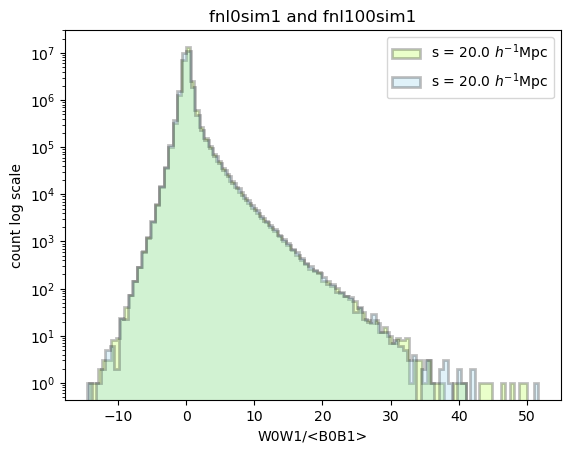

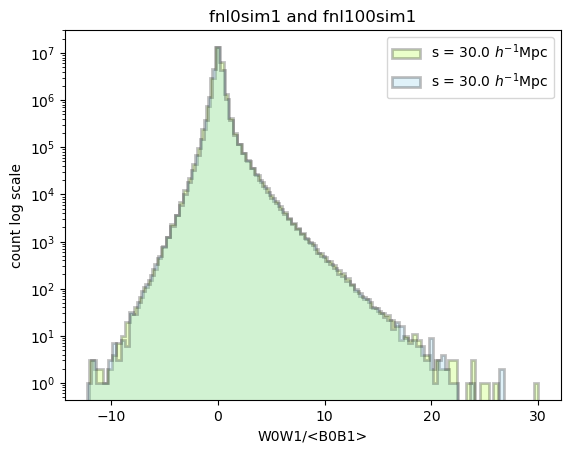

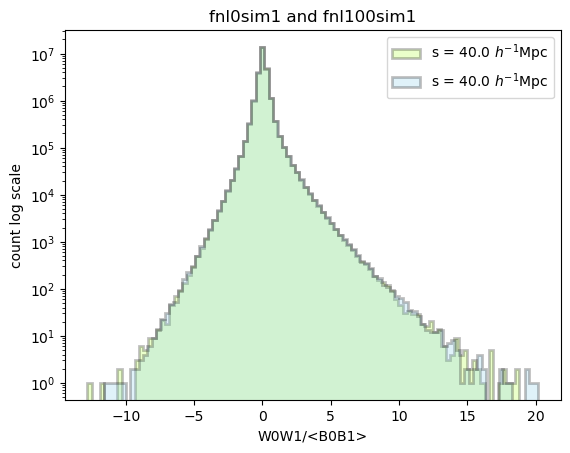

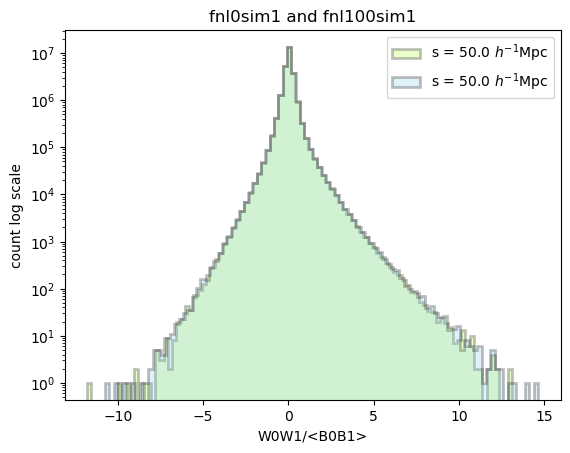

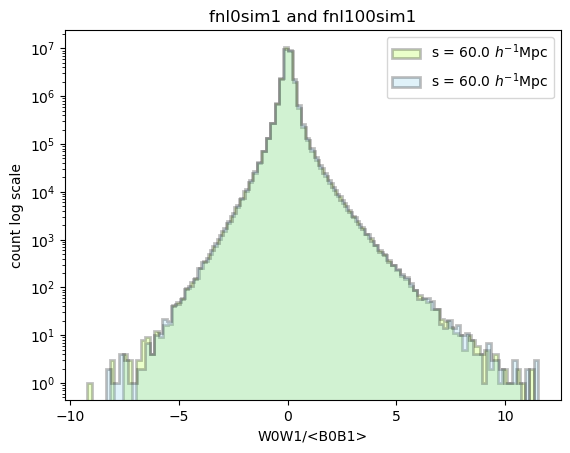

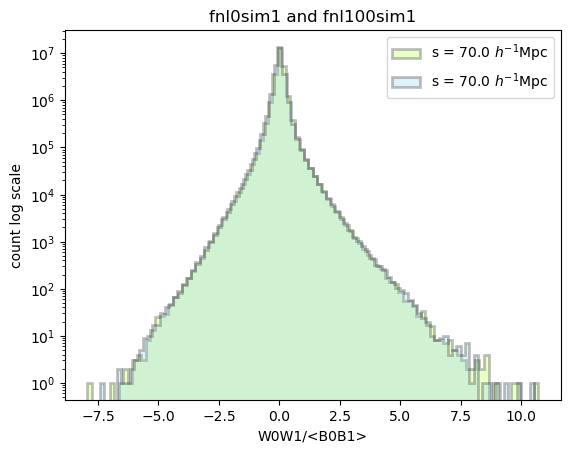

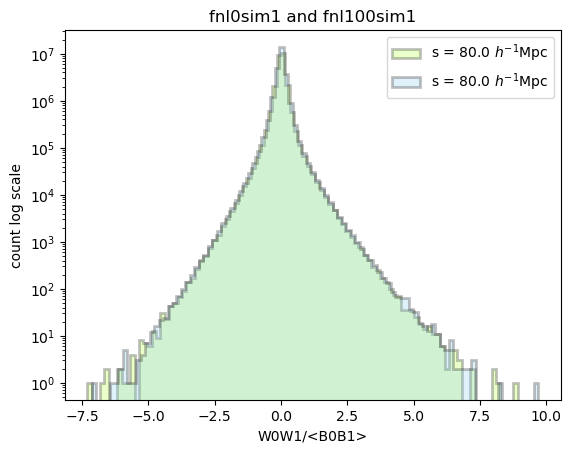

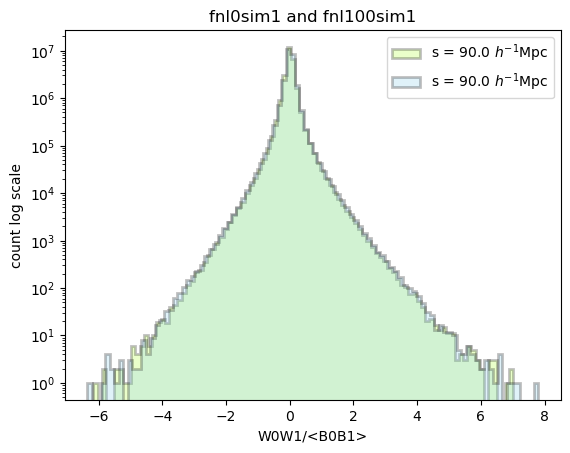

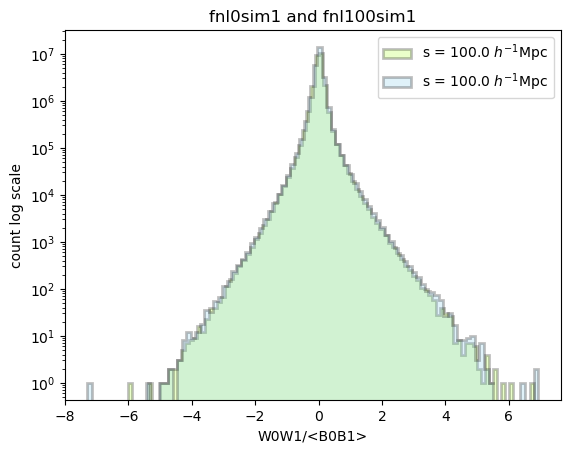

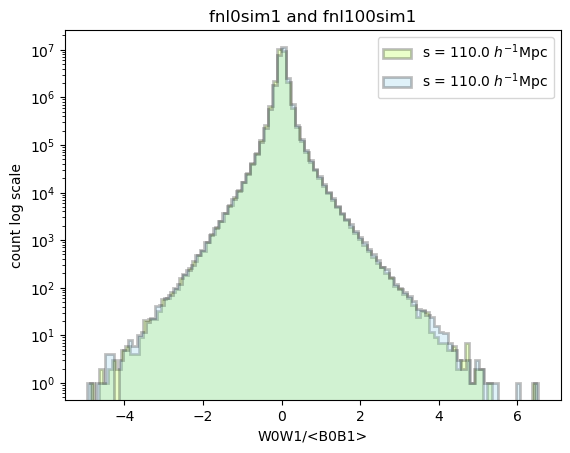

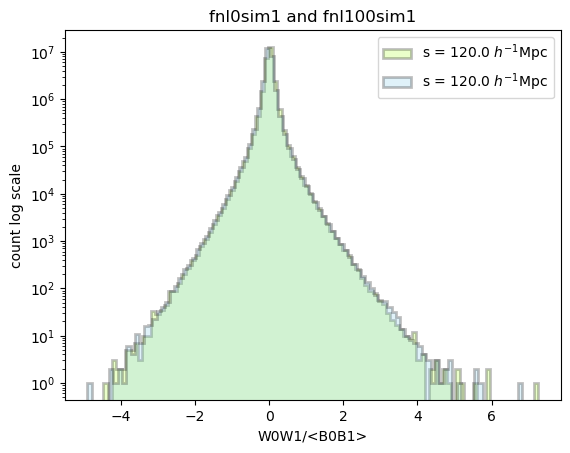

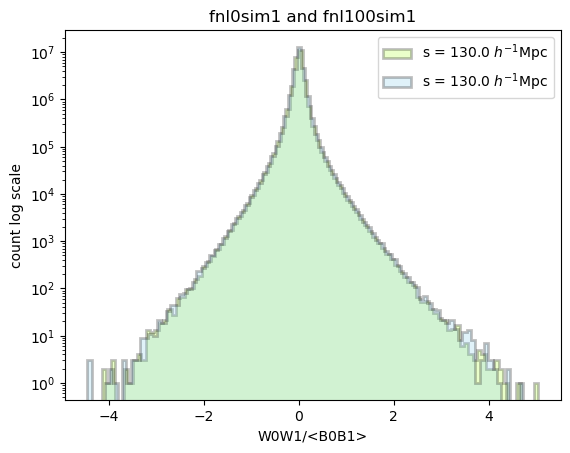

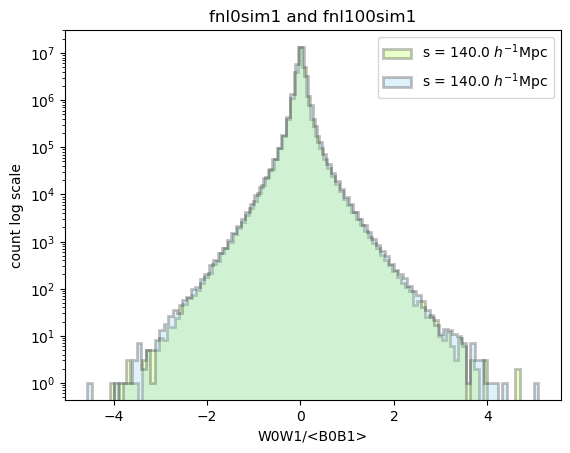

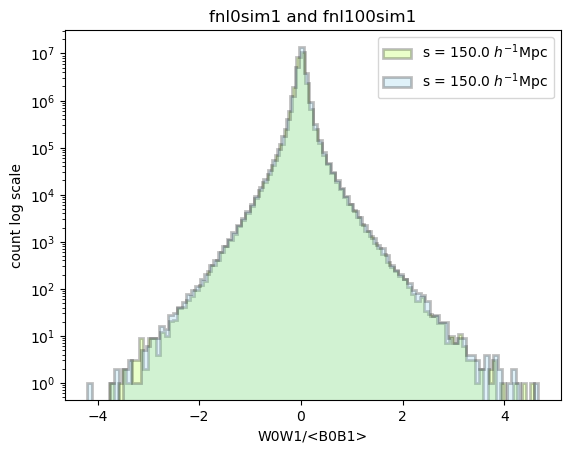

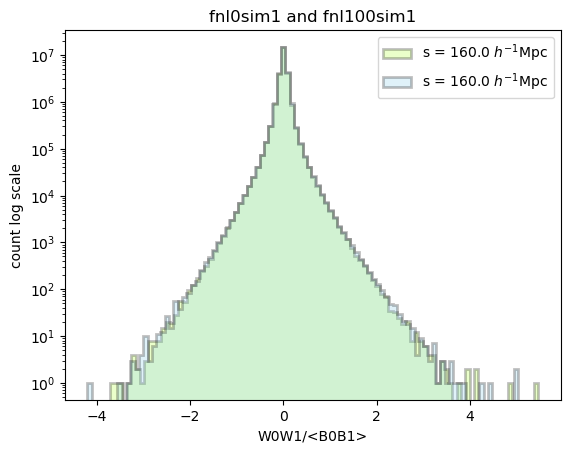

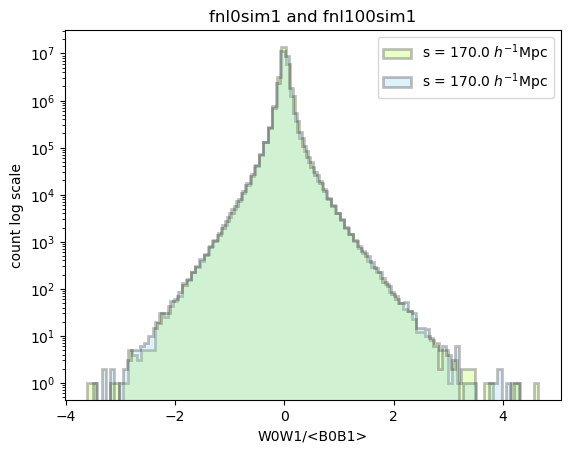

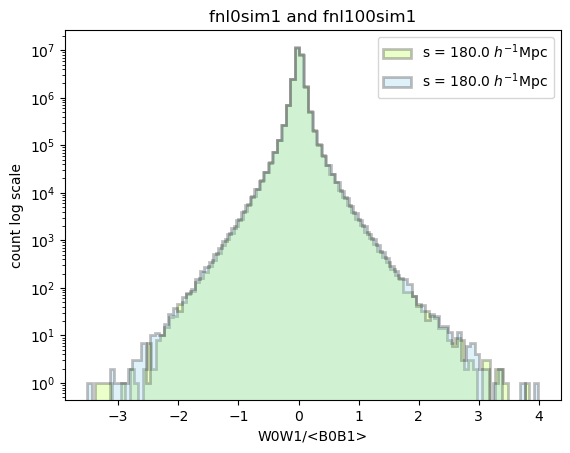

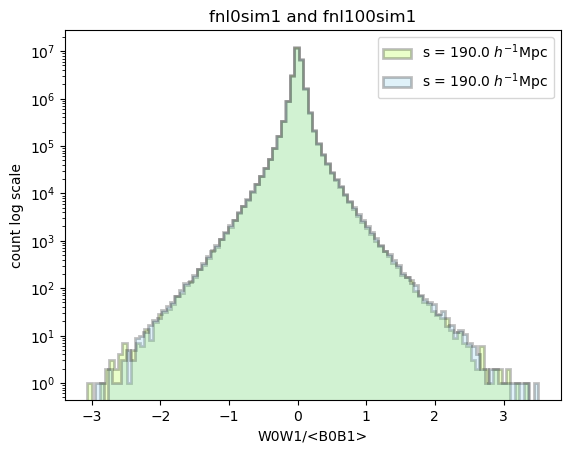

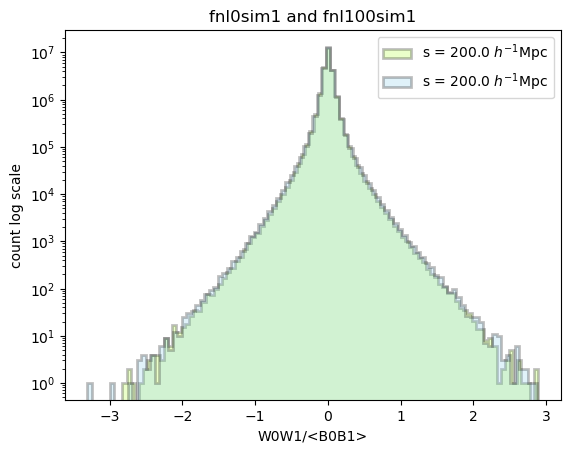

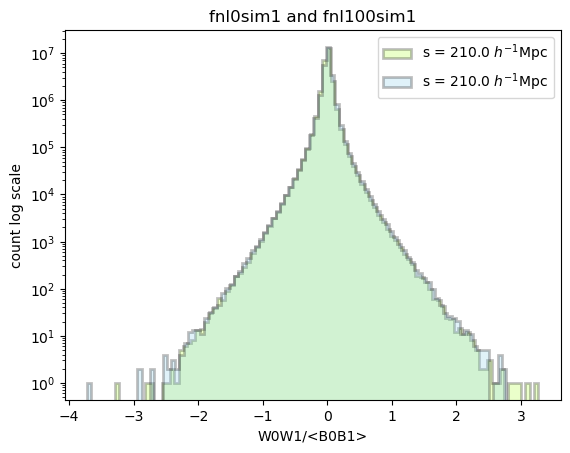

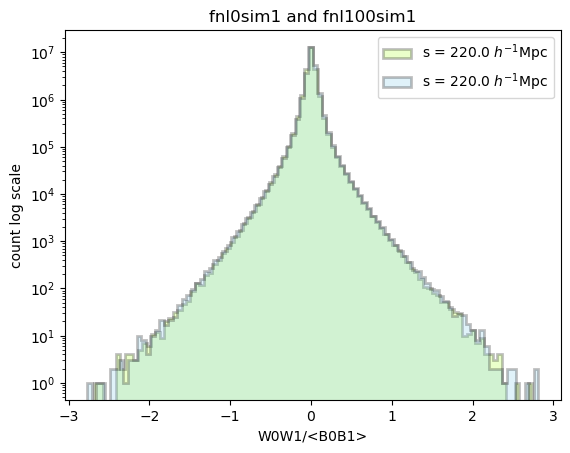

In [4]:
PlotHistograms(fnl0, fnl100)